In [1]:
# Cluster analysis of sequence data
# Justin Heyer

In [2]:
from Bio import SeqIO
import numpy as np
from scipy.spatial.distance import hamming
from sklearn.manifold import MDS
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [3]:
# Step #1: Reading sequences from the FASTA file
seq_data = list(SeqIO.parse("HW2.fas", "fasta"))

In [4]:
# Step #2: Calculating pairwise distances between sequences using Hamming distance (the number of positions at which the sequences are different)
# Initializing hamming distance matrix
num_seq = len(seq_data)
hamming_dist_mat = np.zeros((num_seq-1, num_seq-1))

# Computing hamming distance matrix
for i in range(0, num_seq-1):
    for j in range(i+1, num_seq-1):
        hamming_dist_mat[i, j] = int(hamming(seq_data[i].seq, seq_data[j].seq) * len(seq_data[i].seq))
        hamming_dist_mat[j, i] = hamming_dist_mat[i, j]

print(hamming_dist_mat)

[[ 0.  1.  1. ... 87. 76. 74.]
 [ 1.  0.  2. ... 88. 77. 75.]
 [ 1.  2.  0. ... 88. 77. 75.]
 ...
 [87. 88. 88. ...  0. 31. 31.]
 [76. 77. 77. ... 31.  0.  4.]
 [74. 75. 75. ... 31.  4.  0.]]


In [5]:
# Step #3: Projecting the sequences in 2-D space using Multidimensional Scaling (MDS) based on Hamming distance matrix
model_2d = MDS(n_components=2, 
            metric=True,
            dissimilarity='precomputed',
            n_init=10,
            n_jobs=1,
            random_state=42)

MDS_mat = model_2d.fit_transform(hamming_dist_mat)

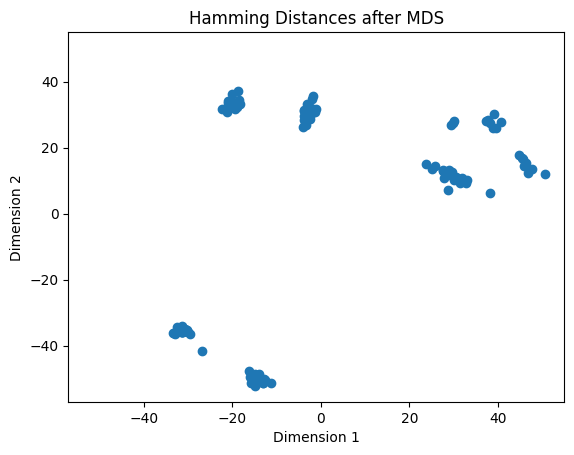

In [6]:
# Step #4: Plotting the obtained 2-D data points and estimating the number of clusters K by visual inspection+_
hamming_dist_plot = plt.scatter(x = MDS_mat[:, 0], y = MDS_mat[:, 1])

plt.title("Hamming Distances after MDS")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
hamming_mat_min = int(np.amin(MDS_mat))
hamming_mat_max = int(np.amax(MDS_mat))
plt.xlim([hamming_mat_min - 5, hamming_mat_max + 5])
plt.ylim([hamming_mat_min - 5, hamming_mat_max + 5])
hamming_dist_plot

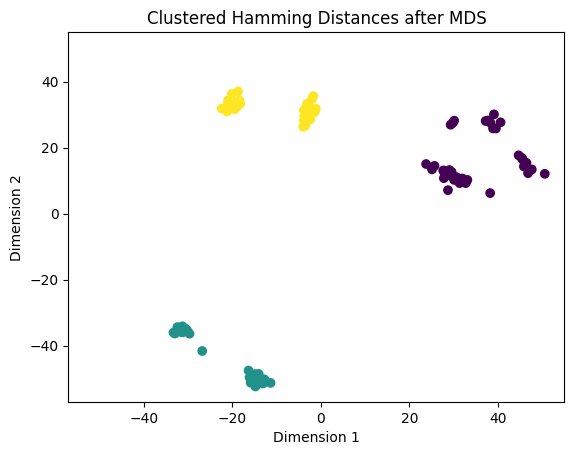

In [7]:
# Step #5: Using k-means algorithm to cluster the 2-D data points
kmeans = KMeans(n_clusters=3).fit(MDS_mat)
kmeans_plot = plt.scatter(MDS_mat[:, 0], MDS_mat[:, 1], c=kmeans.labels_.astype(float))
plt.title("Clustered Hamming Distances after MDS")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.xlim([hamming_mat_min - 5, hamming_mat_max + 5])
plt.ylim([hamming_mat_min - 5, hamming_mat_max + 5])
kmeans_plot